## ***What are the key features of the wine quality data set***

In [8]:
import pandas as pd

df = pd.read_csv('/content/WineQT.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2


In [12]:
# separating dependent and independent feature

X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

In [18]:
# Feature Importance with mutual info

from sklearn.feature_selection import mutual_info_classif

mi_score = mutual_info_classif(X, y.values.flatten(), random_state=21)
mi_score = pd.Series(mi_score, name="MI Scores",index=X.columns)
mi_score = mi_score.sort_values(ascending=False)

mi_score

,MI Scores
alcohol,0.194704
volatile acidity,0.093353
sulphates,0.091730
total sulfur dioxide,0.074248
citric acid,0.068039
density,0.062039
fixed acidity,0.056103
free sulfur dioxide,0.029537
pH,0.018683
chlorides,0.018668


Text(0.5, 1.0, 'Mutual Inofrmation scores')

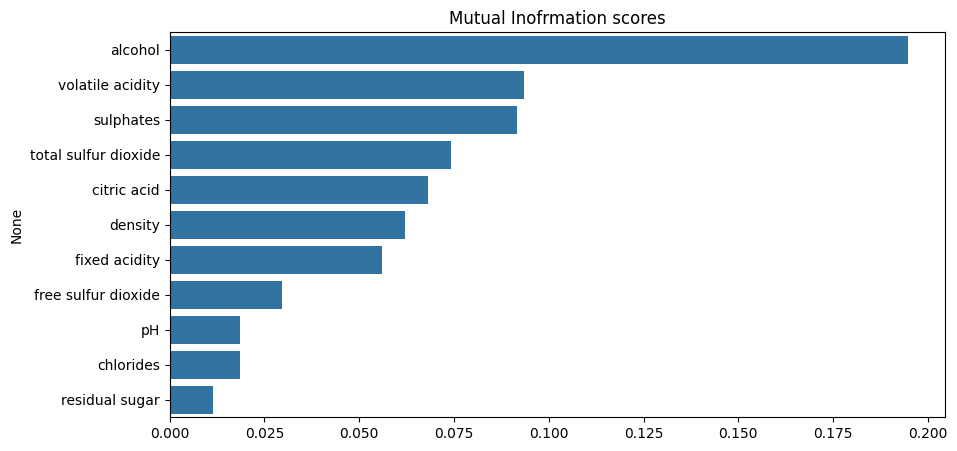

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
sns.barplot(x=mi_score.values, y=mi_score.index)
plt.title("Mutual Inofrmation scores")

***Observations : Alcohol, Volatile Acidity and Sulphates are top 3 features in the dataset***

<br>


### ***How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.***

In [34]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


***Observation : Wine Quality does not have missing values in the dataset***

<br>

In [ ]:
X = df.drop(['quality'], axis=1)


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


iter_impute = IterativeImputer(max_iter = 10, random_state=21)
df[X.columns] = iter_impute.fit_transform(X)[:,0]


<br>